## Concrete Strength Prediction

#### Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

#### Resources Available
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

### Steps and Tasks:
#### Exploratory data quality report reflecting the following:
1. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers (10 Marks)
2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)
3. Feature Engineering techniques (10 marks)
        a. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
        b. Get data model ready and do a train test split.
        c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.
#### Creating the model and tuning it
1. Algorithms that you think will be suitable for this project (one tree based and one bagging algorithm and one boosting algorithm). Use Kfold and Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)
2. Techniques employed to squeeze that extra performance out of the model without making it over fit or under fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)
3. Optional - Model performance range at 95% confidence level

### Attribute Information:
Given are the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

### Name -- Data Type -- Measurement -- Description
1. Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
2. Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
3. Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
4. Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
5. Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
6. Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
7. Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
8. Age(age) -- quantitative -- Day (1~365) -- Input Variable
9. Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,RandomizedSearchCV

In [2]:
cs_df = pd.read_csv(r"C:\Users\admin\Desktop\AIML\Feature Engineering, Model Selection & Tuning\Project\concrete.csv")
cs_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


Target is continious variable, it is a regression problem.

In [3]:
cs_df.shape

(1030, 9)

In [4]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
cs_df.isnull().sum().sum()

0

In [6]:
cs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


1. There are no null values.
2. Columns like slag, ash, superplastic has zero
3. No negative values.

In [7]:
cs_df[['slag','ash','superplastic']][cs_df==0].count()

slag            471
ash             566
superplastic    379
dtype: int64

In [8]:
cs_df.columns[(cs_df == 0).any()]

Index(['slag', 'ash', 'superplastic'], dtype='object')

In [9]:
for column in cs_df.columns[(cs_df == 0).any()]:
    print(cs_df[cs_df[column]==0].groupby([column])['strength'].sum())
#data[data.pdays<0].groupby(['previous','poutcome'])['pdays'].value_counts(sort=True)

slag
0.0    14883.36
Name: strength, dtype: float64
ash
0.0    20812.83
Name: strength, dtype: float64
superplastic
0.0    11187.13
Name: strength, dtype: float64


Strength has value when slag, ash and superplastic is zero. These zeros needs to be handled.

In [10]:
#replacing zero's with median
cs_df['slag']= cs_df['slag'].replace(0,cs_df['slag'].median())
cs_df['superplastic']= cs_df['superplastic'].replace(0,cs_df['superplastic'].median())

In [11]:
#replacing zero's with mean
#median is also zero for ash, so replacing it with mean
cs_df['ash']= cs_df['ash'].replace(0,cs_df['ash'].mean())

In [12]:
for column in cs_df.columns[(cs_df == 0).any()]:
    print(cs_df[cs_df[column]==0].groupby([column])['strength'].sum())

In [13]:
#Converting into months using age
def month(cs_df):
    if cs_df["age"]<=30:
        return 1
    if cs_df['age']>30 and cs_df['age']<=60:
        return 2
    if cs_df['age']>60 and cs_df['age']<=90:
        return 3
    if cs_df['age']>90 and cs_df['age']<=120:
        return 4    
    if cs_df['age']>120 and cs_df['age']<=150:
        return 5
    if cs_df['age']>150 and cs_df['age']<=180:
        return 6
    if cs_df['age']>180 and cs_df['age']<=210:
        return 7
    if cs_df['age']>210 and cs_df['age']<=240:
        return 8
    if cs_df['age']>240 and cs_df['age']<=270:
        return 9
    if cs_df['age']>270 and cs_df['age']<=300:
        return 10
    if cs_df['age']>300 and cs_df['age']<=330:
        return 11
    if cs_df['age']>330:
        return 12   
cs_df['ageInMonths']= cs_df.apply(lambda cs_df:month(cs_df) , axis=1)

In [14]:
cs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.37500,272.90000,350.000,540.0
slag,1030.0,83.956019,77.949347,11.00,22.00000,22.00000,142.950,359.4
ash,1030.0,83.965637,39.911375,24.50,54.18835,54.18835,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.90000,185.00000,192.000,247.0
superplastic,1030.0,8.559612,3.996271,1.70,6.40000,6.40000,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.00000,968.00000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.95000,779.50000,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.00000,28.00000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.71000,34.44500,46.135,82.6
ageInMonths,1030.0,1.858252,2.006623,1.00,1.00000,1.00000,2.000,12.0


After replacing zeros, q25, q50 are same for slag, ash and superplastic

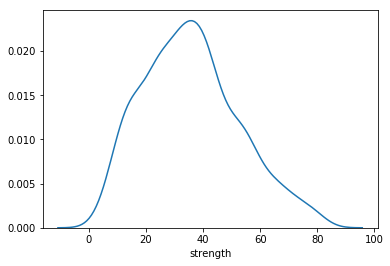

In [15]:
sns.distplot(cs_df['strength'], hist=False)

Target column Strength is kind of normal distribution

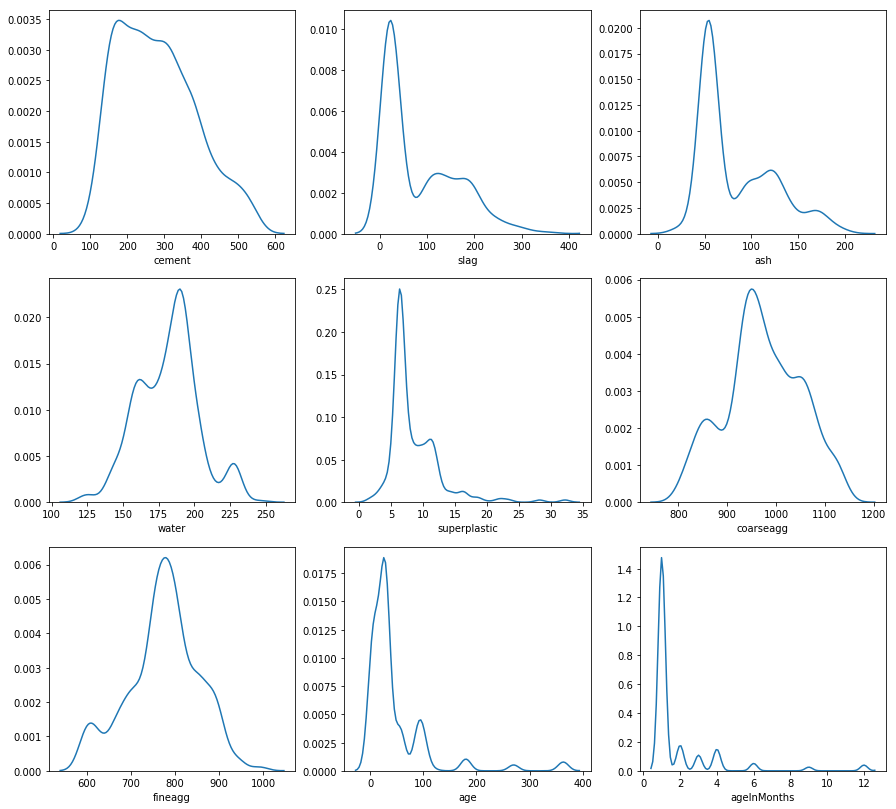

In [16]:
plt.figure(figsize=(15,14))
pos = 1
for i in cs_df.drop(columns='strength').columns:
    plt.subplot(3,3, pos)
    sns.distplot(cs_df[i], hist=False)
    pos +=1

1. except cement column all other columns may have outliers.
2. slag, ash, superplastic, age are right skewed.

In [17]:
#to avoid data leakge, removing outliers in splitted X_train dataset
out_col = np.array([])
for i in cs_df.drop(columns='strength').columns:
    Q25 = cs_df[i].quantile(0.25)
    Q75 = cs_df[i].quantile(0.75)
    IQR = Q75 - Q25
    outliers_count = cs_df[i][((cs_df[i]<(Q25-1.5*IQR))|(cs_df[i]>(Q75+1.5*IQR)))]
    if(len(outliers_count)>0):
        out_col = np.append(out_col,i)
        print("Outliers present in",i,"is",len(outliers_count))

Outliers present in slag is 4
Outliers present in water is 9
Outliers present in superplastic is 59
Outliers present in fineagg is 5
Outliers present in age is 59
Outliers present in ageInMonths is 136


In [18]:
cs_df.drop(columns = 'strength').columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'ageInMonths'],
      dtype='object')

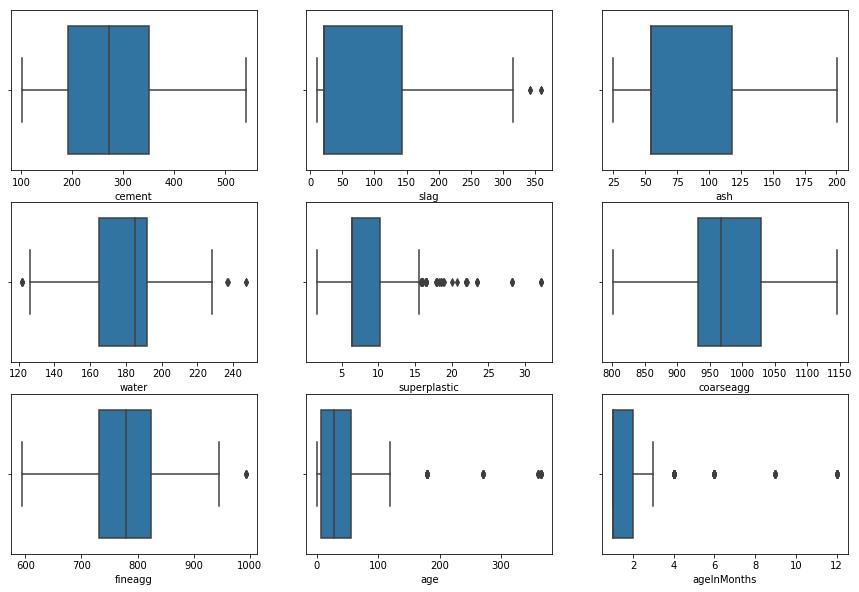

In [19]:
plt.figure(figsize=(15,10))
pos = 1
for i in cs_df.drop(columns = 'strength').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(cs_df[i])
    pos += 1 

1. As discussed before, q25 and q50 are same for slag, ash and superplastic columns. so median and q25 are in same line
2. 5 columns: slag, water, superplastic, fineagg and age have outliers, but minimum in number.
3. ageInMonths is the column created apart from data. It also has outliers.

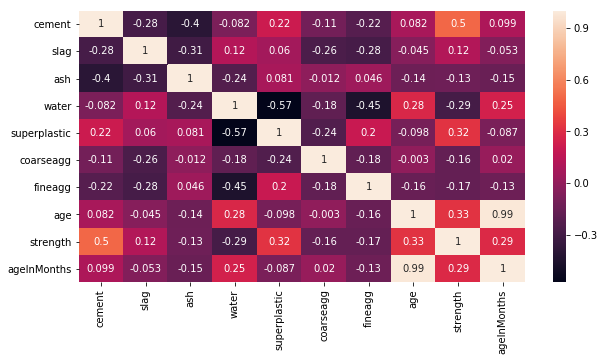

In [20]:
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(cs_df.corr(),annot=True,ax=ax)

Cement and strength has high correlation.

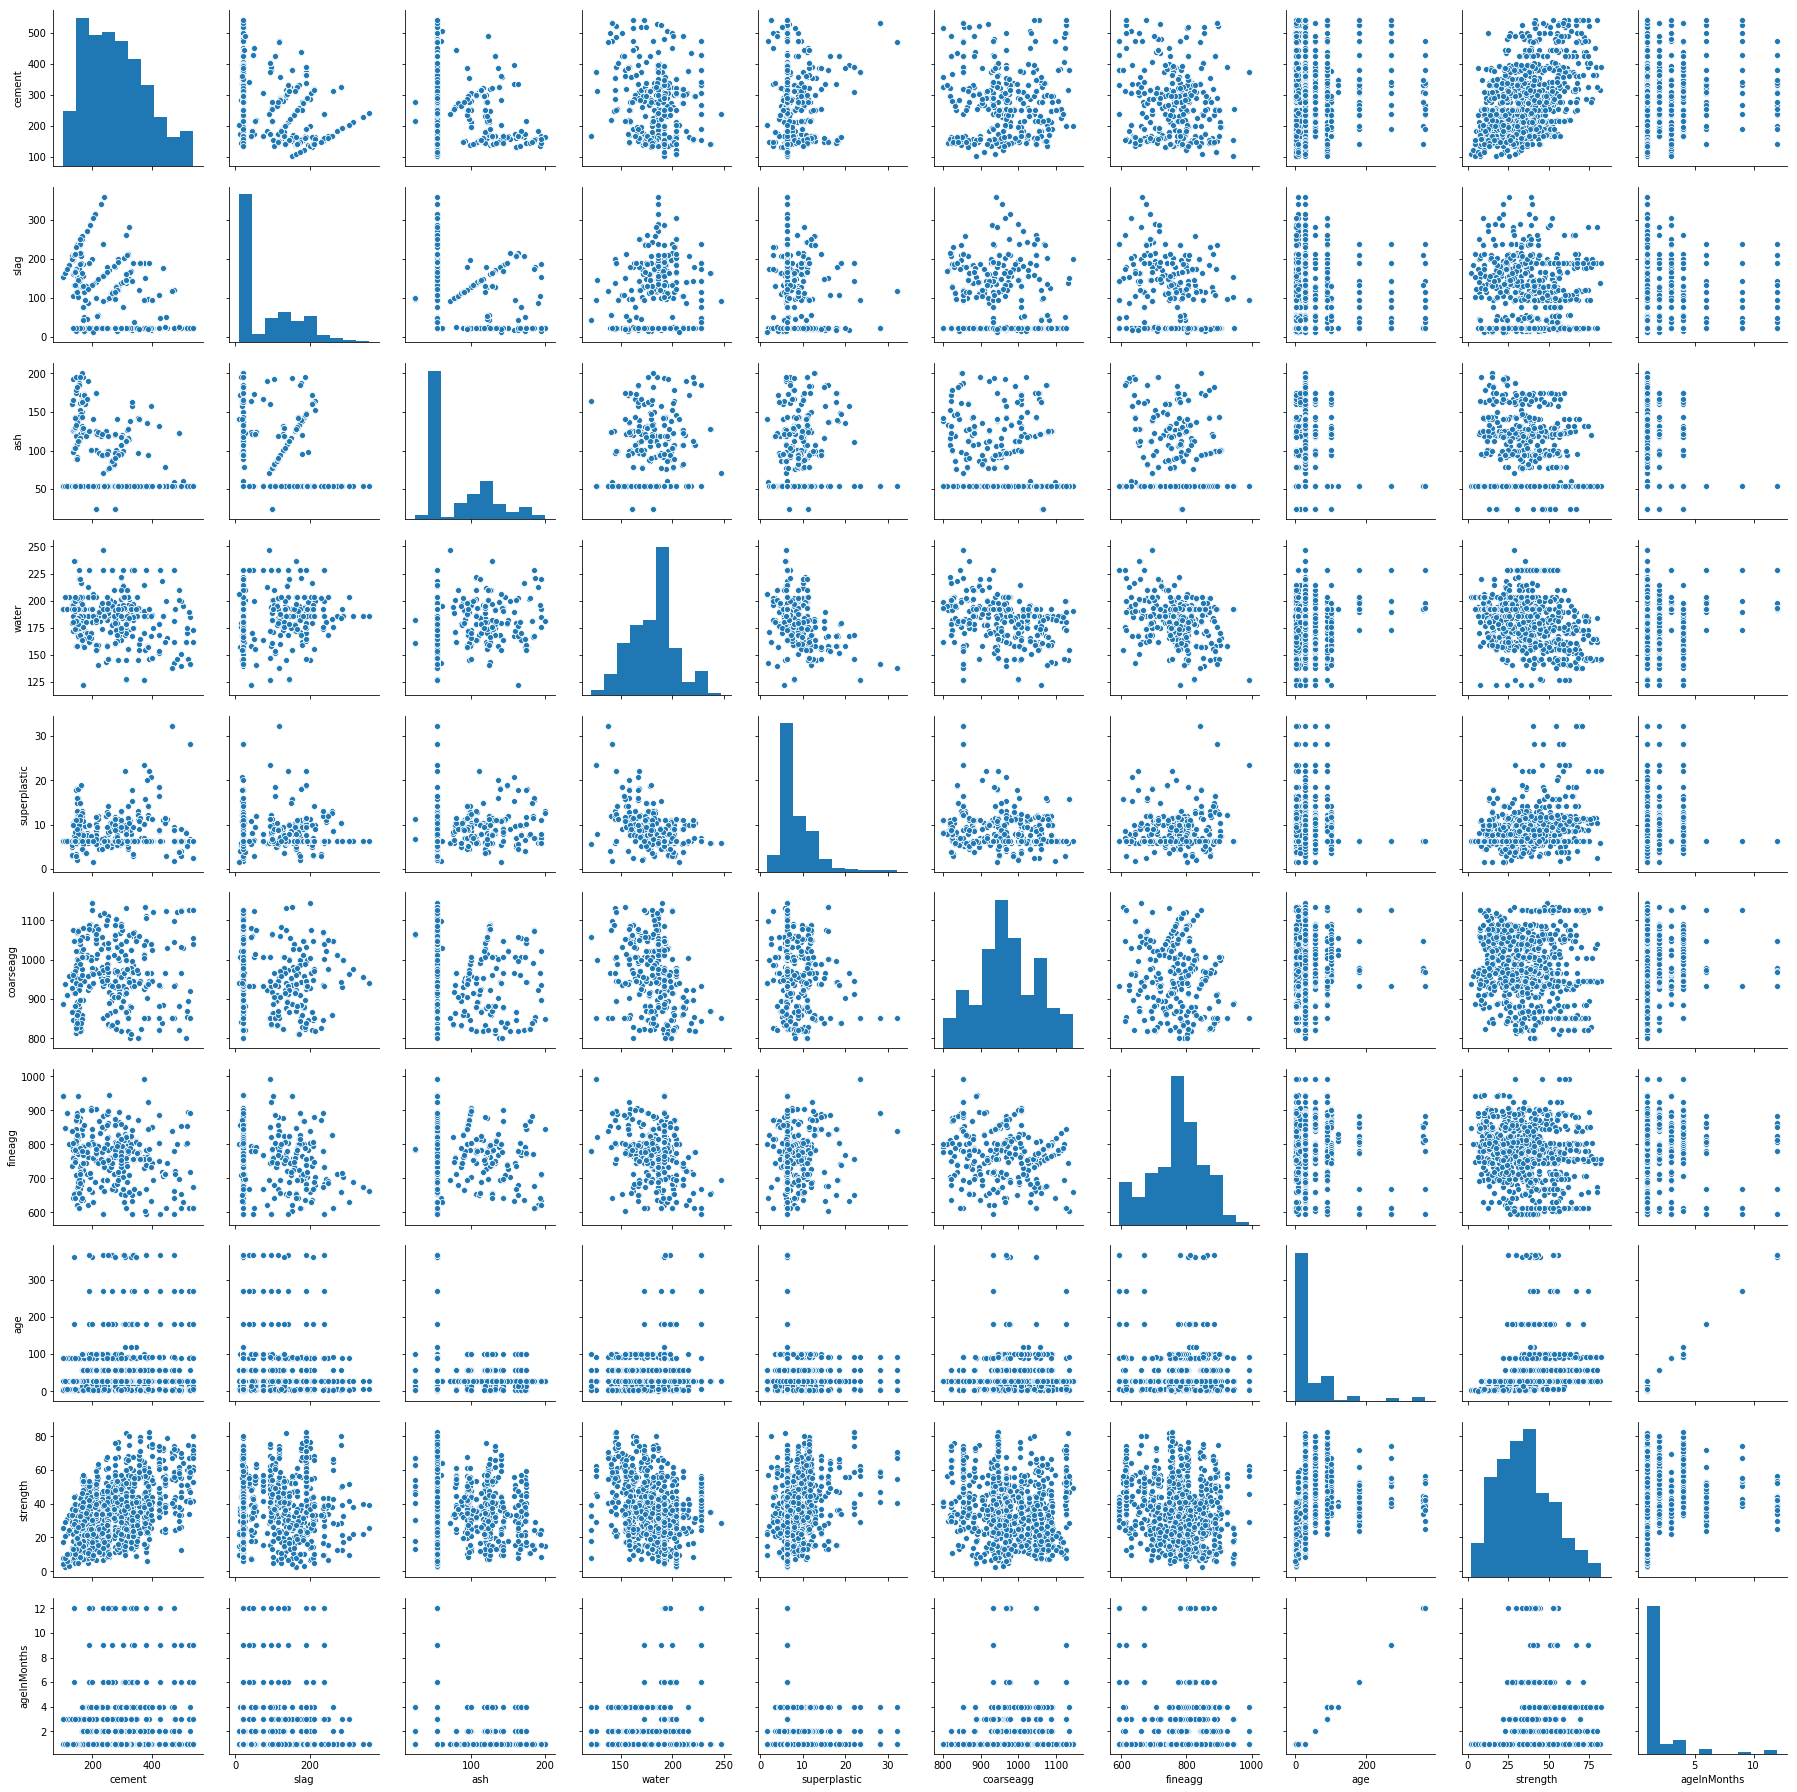

In [21]:
sns.pairplot(cs_df)

1. There is no strong relationship between any attributes except strength and cement.
2. Water and superplastic kind of have a negative correlation

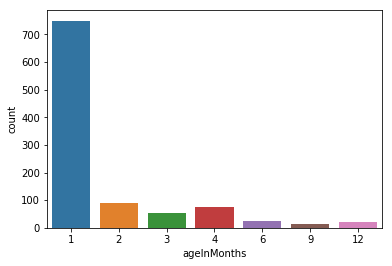

In [22]:
sns.countplot(x='ageInMonths',data=cs_df)

After converting age to months, it is more right skewed and has more records with age less than 30

In [23]:
cs_df['ageInMonths'].value_counts(sort=True)

1     749
2      91
4      77
3      54
6      26
12     20
9      13
Name: ageInMonths, dtype: int64

In [24]:
X = cs_df.drop(columns={'strength','ageInMonths'},axis=1)
Y = cs_df['strength']

In [25]:
print(X.shape)
print(Y.shape)

(1030, 8)
(1030,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(721, 8)
(721,)
(309, 8)
(309,)


In [27]:
#to avoid data leakge, removing outliers in splitted X_train dataset
Q25 = X_train.quantile(0.25)
Q75 = X_train.quantile(0.75)
IQR = Q75 - Q25
for x,y in zip(np.where(X_train < Q25 - 1.5 * IQR)[0], np.where(X_train < Q25 - 1.5 * IQR)[1]):
    whisker  = Q25 - 1.5 * IQR
    X_train.iloc[x,y] = whisker[y]
for x,y in zip(np.where(X_train > Q75 + 1.5 * IQR)[0], np.where(X_train > Q75 + 1.5 * IQR)[1]):
    whisker  = Q75 + 1.5 * IQR
    X_train.iloc[x,y] = whisker[y]

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD fro

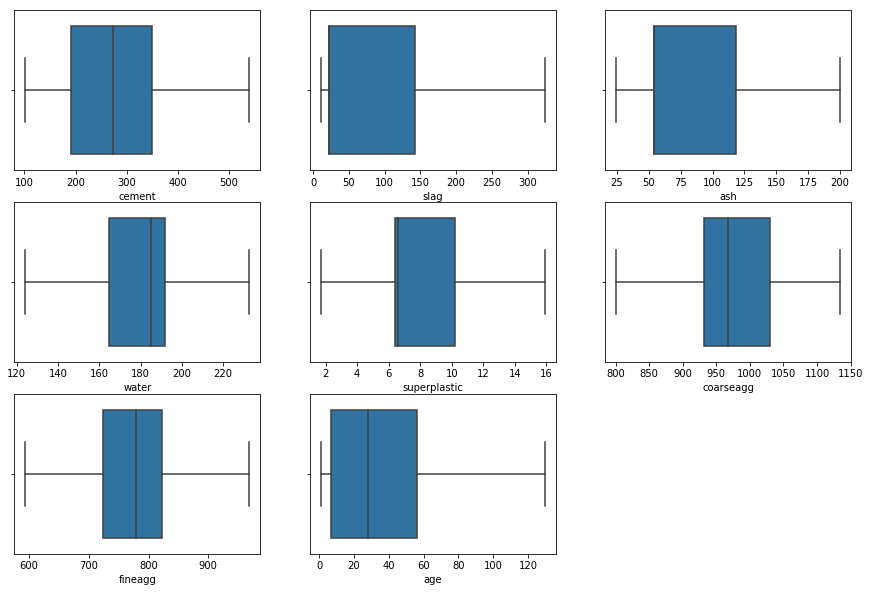

In [28]:
#After removing outliers
plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_train[i])
    pos += 1 

### Decision Tree

In [29]:
dtree = DecisionTreeRegressor(criterion='mse',random_state=1, max_depth=9)
dtree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [30]:
print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.357491
slag          0.094700
ash           0.010914
water         0.124136
superplastic  0.016881
coarseagg     0.029609
fineagg       0.025721
age           0.340548


Cement and age are most important factors according to decision tree model

In [31]:
dtree_train_acc = round(dtree.score(X_train,Y_train),2)*100
print("Training accuracy:",round(dtree.score(X_train,Y_train),2))

Training accuracy: 0.97


In [32]:
#predicting values
y_pred = dtree.predict(X_test)

In [33]:
dtree_test_acc = round(dtree.score(X_test,Y_test),2)*100
print("Testing accuracy:",round(dtree.score(X_test,Y_test),2))

Testing accuracy: 0.85


In [34]:
#Calculation RMSE, MSE, MAE
dtree_rmse = round(np.sqrt(mean_squared_error(Y_test,y_pred)),2)
dtree_mse = round(mean_squared_error(Y_test,y_pred),2)
dtree_mae = round(mean_absolute_error(Y_test,y_pred),2)
dtree_r2 = round(r2_score(Y_test,y_pred),2)*100
print("Model\t\t\t RMSE \t MSE \t MAE \t R2")
print("Decision Tree\t\t", dtree_rmse ,"\t", dtree_mse, "\t", dtree_mae,"\t",dtree_r2)

Model			 RMSE 	 MSE 	 MAE 	 R2
Decision Tree		 6.62 	 43.79 	 4.66 	 85.0


### Random Forest

In [35]:
#Random Forest
rand = RandomForestRegressor(n_estimators=50, random_state=1, max_depth=7)
rand.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [36]:
rand_train_acc = round(rand.score(X_train,Y_train),2)*100
print("Training accuracy:",round(rand.score(X_train,Y_train),2))

Training accuracy: 0.95


In [37]:
#predicting values
y_pred = rand.predict(X_test)
rand_test_acc = round(rand.score(X_test,Y_test),2)*100
print("Testing accuracy:",round(rand.score(X_test,Y_test),2))

Testing accuracy: 0.88


In [38]:
#Calculation RMSE, MSE, MAE
rand_rmse = round(np.sqrt(mean_squared_error(Y_test,y_pred)),2)
rand_mse = round(mean_squared_error(Y_test,y_pred),2)
rand_mae = round(mean_absolute_error(Y_test,y_pred),2)
rand_r2 = round(r2_score(Y_test,y_pred),2)*100
print("Model\t\t\t RMSE \t MSE \t MAE \t R2")
print("Random Forest\t\t", rand_rmse ,"\t", rand_mse, "\t", rand_mae,"\t",rand_r2)

Model			 RMSE 	 MSE 	 MAE 	 R2
Random Forest		 5.96 	 35.46 	 4.55 	 88.0


### Bagging

In [39]:
bag = BaggingRegressor(n_estimators=50,random_state=10)
bag = bag.fit(X_train, Y_train)

In [40]:
bag.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [41]:
bag_train_acc = round(bag.score(X_train,Y_train),2)*100
print("Training accuracy:",round(bag.score(X_train,Y_train),2))

Training accuracy: 0.98


In [42]:
#predicting values
y_pred = bag.predict(X_test)
bag_test_acc = round(bag.score(X_test,Y_test),2)*100
print("Testing accuracy:",bag_test_acc)

Testing accuracy: 90.0


In [43]:
#Calculation RMSE, MSE, MAE
bag_rmse = round(np.sqrt(mean_squared_error(Y_test,y_pred)),2)
bag_mse = round(mean_squared_error(Y_test,y_pred),2)
bag_mae = round(mean_absolute_error(Y_test,y_pred),2)
bag_r2 = round(r2_score(Y_test,y_pred),2)*100
print("Model\t\t RMSE \t MSE \t MAE \t R2")
print("Bagging\t\t", bag_rmse ,"\t", bag_mse, "\t", bag_mae,"\t",bag_r2)

Model		 RMSE 	 MSE 	 MAE 	 R2
Bagging		 5.39 	 29.08 	 3.74 	 90.0


### Boosting

In [44]:
boost = GradientBoostingRegressor(n_estimators=50,max_depth=5,random_state=10)
boost = boost.fit(X_train, Y_train)

In [45]:
boost_train_acc = round(boost.score(X_train,Y_train),2)*100
print("Training accuracy:",boost_train_acc)

Training accuracy: 97.0


In [46]:
#predicting values
y_pred = boost.predict(X_test)
boost_test_acc = round(boost.score(X_test,Y_test),2)*100
print("Testing accuracy:",boost_test_acc)

Testing accuracy: 90.0


In [47]:
#Calculation RMSE, MSE, MAE
boost_rmse = round(np.sqrt(mean_squared_error(Y_test,y_pred)),2)
boost_mse = round(mean_squared_error(Y_test,y_pred),2)
boost_mae = round(mean_absolute_error(Y_test,y_pred),2)
boost_r2 = round(r2_score(Y_test,y_pred),2)*100
print("Model\t\t\t RMSE \t MSE \t MAE \t R2")
print("Boosting\t\t", boost_rmse ,"\t", boost_mse, "\t", boost_mae,"\t",boost_r2)

Model			 RMSE 	 MSE 	 MAE 	 R2
Boosting		 5.46 	 29.77 	 3.93 	 90.0


### Using K-fold in bagging

In [48]:
num_folds = 20
kfold = KFold(n_splits=num_folds, random_state=10,shuffle=True)
results = cross_val_score(bag,X,Y,cv=kfold)
#print(results)
bag_fold_mean =round(results.mean()*100.0,2)
bag_fold_std =round(results.std()*100.0,2)
print("Accuracy using KFold in bagging: %.3f%% (%.3f%%)" % (bag_fold_mean, bag_fold_std))

Accuracy using KFold in bagging: 91.470% (3.870%)


### Using K-fold in boosting

In [49]:
num_folds = 20
kfold = KFold(n_splits=num_folds, random_state=10,shuffle=True)
results = cross_val_score(boost,X,Y,cv=kfold)
boost_fold_mean =round(results.mean()*100.0,2)
boost_fold_std =round(results.std()*100.0,2)
print("Accuracy using KFold in boosting: %.3f%% (%.3f%%)" % (boost_fold_mean, boost_fold_std))

Accuracy using KFold in boosting: 91.450% (3.340%)


### Using K-fold in decision tree

In [50]:
num_folds = 20
kfold = KFold(n_splits=num_folds, random_state=10,shuffle=True)
results = cross_val_score(dtree,X,Y,cv=kfold)
dtree_fold_mean =round(results.mean()*100.0,2)
dtree_fold_std =round(results.std()*100.0,2)
print("Accuracy using KFold in boosting: %.3f%% (%.3f%%)" % (dtree_fold_mean, dtree_fold_std))

Accuracy using KFold in boosting: 82.940% (8.910%)


### Using K-fold in random forest

In [51]:
num_folds = 20
kfold = KFold(n_splits=num_folds, random_state=10,shuffle=True)
results = cross_val_score(rand,X,Y,cv=kfold)
rand_fold_mean =round(results.mean()*100.0,2)
rand_fold_std =round((results.std()*100.0),2)
print("Accuracy using KFold in random forest: %.3f%% (%.3f%%)" % (rand_fold_mean, rand_fold_std))

Accuracy using KFold in random forest: 88.230% (4.150%)


### Storing result in dataframe

In [52]:
result = {'Classifier':['Decision Tree','Random forest','Bagging','Boosting'],
         'train_score':[dtree_train_acc,rand_train_acc,bag_train_acc,boost_train_acc],
         'test_score':[dtree_test_acc,rand_test_acc,bag_test_acc,boost_test_acc],
         'RMSE':[dtree_rmse,rand_rmse,bag_rmse,boost_rmse],
         'MSE':[dtree_mse,rand_mse,bag_mse,boost_mse],
         'MAE':[dtree_mae,rand_mae,bag_mae,boost_mae],
         'R2':[dtree_r2,rand_r2,bag_r2,boost_r2],
         'KFold-mean':[dtree_fold_mean,rand_fold_mean,bag_fold_mean,boost_fold_mean],
         'KFold-std':[dtree_fold_std,rand_fold_std,bag_fold_std,boost_fold_std]}
result_df = pd.DataFrame(result)
result_df

,Classifier,train_score,test_score,RMSE,MSE,MAE,R2,KFold-mean,KFold-std
0,Decision Tree,97.0,85.0,6.62,43.79,4.66,85.0,82.94,8.91
1,Random forest,95.0,88.0,5.96,35.46,4.55,88.0,88.23,4.15
2,Bagging,98.0,90.0,5.39,29.08,3.74,90.0,91.47,3.87
3,Boosting,97.0,90.0,5.46,29.77,3.93,90.0,91.45,3.34


### Tuning hyperparameters using GridSearchCV and RandomSearchCV

From above result we can see that bagging and boosting perform well with less RMSE, good accuracy and R2 score as 90.

### Bagging with GridSearchCV

In [53]:
gs_cv_params = {'bootstrap':('True','False'),
               'bootstrap_features':('True','False'),
               'oob_score':('True','False'),
               'n_estimators':(50,60,70)}

In [54]:
gs_cv_bag = GridSearchCV(bag,gs_cv_params,cv=10)
gs_cv_bag.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=50, n_jobs=None, oob_score=False, random_state=10,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': ('True', 'False'), 'bootstrap_features': ('True', 'False'), 'oob_score': ('True', 'False'), 'n_estimators': (50, 60, 70)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
bag_train_acc_gscv = round(gs_cv_bag.score(X_train,Y_train),2)*100
print("Testing accuracy:",bag_train_acc_gscv)

Testing accuracy: 96.0


In [56]:
#predicting values
y_pred = gs_cv_bag.predict(X_test)
bag_test_acc_gscv = round(gs_cv_bag.score(X_test,Y_test),2)*100
print("Testing accuracy:",bag_test_acc_gscv)

Testing accuracy: 85.0


In [57]:
#Calculation RMSE, MSE, MAE
bag_gscv_rmse = round(np.sqrt(mean_squared_error(Y_test,y_pred)),2)
bag_gscv_mse = round(mean_squared_error(Y_test,y_pred),2)
bag_gscv_mae = round(mean_absolute_error(Y_test,y_pred),2)
bag_gscv_r2 = round(r2_score(Y_test,y_pred),2)*100
print("Model\t\t\t\t RMSE \t MSE \t MAE \t R2")
print("Bagging with GridSearchCV\t", bag_gscv_rmse ,"\t", bag_gscv_mse, "\t", bag_gscv_mae,"\t",bag_gscv_r2)

Model				 RMSE 	 MSE 	 MAE 	 R2
Bagging with GridSearchCV	 6.53 	 42.69 	 4.86 	 85.0


### Boosting with RandomSearchCV

In [58]:
rs_cv_params={'alpha':(0.7,0.8,0.9),
             'criterion':('friedman_mse','mse','mae'),
             'loss':('ls', 'lad', 'huber', 'quantile'),
             'max_depth':(4,5,6,7)
             }

In [59]:
rs_cv_boost = RandomizedSearchCV(boost, param_distributions=rs_cv_params, n_iter=5,cv=5,error_score='raise',random_state=10)
rs_cv_boost.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=10, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'alpha': (0.7, 0.8, 0.9), 'criterion': ('friedman_mse', 'mse', 'mae'), 'loss': ('ls', 'lad', 'huber', 'quantile'), 'max_depth': (4, 5, 6, 7)},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [60]:
boost_train_acc_rscv = round(rs_cv_boost.score(X_train,Y_train),2)*100
print("Testing accuracy:",boost_train_acc_rscv)

Testing accuracy: 97.0


In [61]:
rs_cv_boost.best_params_

{'max_depth': 7, 'loss': 'lad', 'criterion': 'friedman_mse', 'alpha': 0.9}

In [62]:
#predicting values
y_pred = rs_cv_boost.predict(X_test)
boost_test_acc_rscv = round(rs_cv_boost.score(X_test,Y_test),2)*100
print("Testing accuracy:",boost_test_acc_rscv)

Testing accuracy: 91.0


In [63]:
#Calculation RMSE, MSE, MAE
boost_rscv_rmse = round(np.sqrt(mean_squared_error(Y_test,y_pred)),2)
boost_rscv_mse = round(mean_squared_error(Y_test,y_pred),2)
boost_rscv_mae = round(mean_absolute_error(Y_test,y_pred),2)
boost_rscv_r2 = round(r2_score(Y_test,y_pred),2)*100
print("Model\t\t\t\t RMSE \t MSE \t MAE \t R2")
print("Bagging with GridSearchCV\t", boost_rscv_rmse ,"\t", boost_rscv_mse, "\t", boost_rscv_mae,"\t",boost_rscv_r2)

Model				 RMSE 	 MSE 	 MAE 	 R2
Bagging with GridSearchCV	 5.16 	 26.64 	 3.57 	 91.0


In [64]:
##Final result
result_cv = {'Classifier':['Bagging with GridSearchCV','Boosting with RandomSearchCV'],
         'train_score':[bag_train_acc_gscv,boost_train_acc_rscv],
         'test_score':[bag_test_acc_gscv,boost_test_acc_rscv],
         'RMSE':[bag_gscv_rmse,boost_rscv_rmse],
         'MSE':[bag_gscv_mse,boost_rscv_mse],
         'MAE':[bag_gscv_mae,boost_rscv_mae],
         'R2':[bag_gscv_r2,boost_rscv_r2]}
result_cv_df = pd.DataFrame(result_cv)
result_cv_df

,Classifier,train_score,test_score,RMSE,MSE,MAE,R2
0,Bagging with GridSearchCV,96.0,85.0,6.53,42.69,4.86,85.0
1,Boosting with RandomSearchCV,97.0,91.0,5.16,26.64,3.57,91.0


After using RandomSearchCV in GradientBoosting, the test accuracy and R2 Score increased slightly.

In [65]:
[Y_test.min(), Y_test.max()]

[4.78, 82.6]

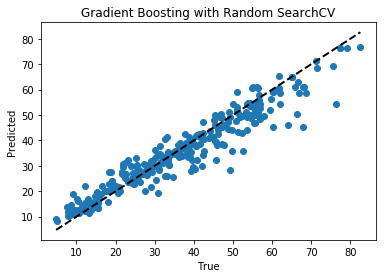

In [66]:
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.ylabel("Predicted")
plt.xlabel("True")
plt.title("Gradient Boosting with Random SearchCV")
plt.show()

[Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Random forest'),
 Text(0, 0, 'Bagging'),
 Text(0, 0, 'Boosting'),
 Text(0, 0, 'Bagging with GridSearchCV'),
 Text(0, 0, 'Boosting with RandomSearchCV')]

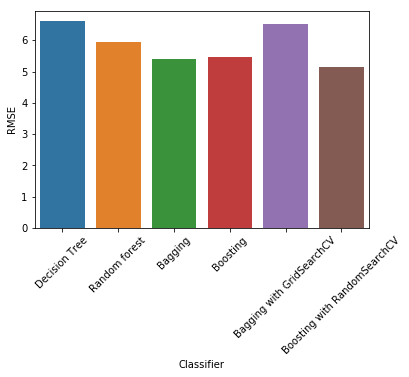

In [67]:
result_fin = result_df.append(result_cv_df,sort='False')
ax = sns.barplot(y='RMSE',x='Classifier',data=result_fin)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Model performance range at 95% confidence level

Finding confident level for all the test scores identified using GradientBoosting technique with RandomSearchCV.

In [68]:
rs_cv_boost_mean_test_score = rs_cv_boost.cv_results_['mean_test_score']

In [69]:
rs_cv_boost_test_score = list()
rs_cv_boost_test_score.append(rs_cv_boost.cv_results_['split0_test_score'])
rs_cv_boost_test_score.append(rs_cv_boost.cv_results_['split1_test_score'])
rs_cv_boost_test_score.append(rs_cv_boost.cv_results_['split2_test_score'])
rs_cv_boost_test_score.append(rs_cv_boost.cv_results_['split3_test_score'])
rs_cv_boost_test_score.append(rs_cv_boost.cv_results_['split4_test_score'])

In [70]:
rs_cv_boost_test_score

[array([0.89554778, 0.81846562, 0.89787636, 0.89787636, 0.89623948]),
 array([0.8704107 , 0.70276318, 0.84949496, 0.8496267 , 0.8441985 ]),
 array([0.84155401, 0.72899522, 0.87705034, 0.88070329, 0.85335061]),
 array([0.90904208, 0.77161617, 0.88792747, 0.88401433, 0.8941194 ]),
 array([0.88492566, 0.79661322, 0.88716521, 0.89005346, 0.89176281])]

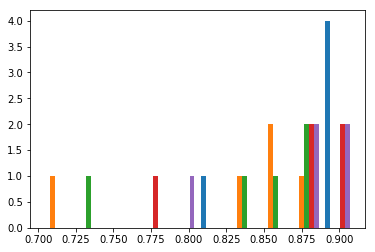

95.0 confidence interval 71.9% and 90.2%


In [71]:
plt.hist(rs_cv_boost_test_score)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100           
lower = max(0.0, np.percentile(rs_cv_boost_test_score, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(rs_cv_boost_test_score, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Gradient boosting with Random Search CV performs well compare to other models. RMSE is less along with decent accuracy and R2 Score.